<a href="https://colab.research.google.com/gist/seagomezar/4e8f15cda9e26c6cf36d12365e03d863/smbd_trabajofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de tenencias en desarrolladores de software

In [33]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from enum import Enum

## **Lenguajes de programación**

In [34]:
# Cargando los datos
data = pd.read_csv('consolidado_lenguajes.csv') # Asegurate de tenerlo en tu entorno local
# Solo escogeremos los primeros 9 lenguajes que son los que más consistencia han tenido a través de los años.
data = data.drop(['Go','R','Objective-C','Scala','Clojure','F#'],1)
data['Lenguaje'][0,1,2,3,4,5,6,7,8] = 2011,2012,2013,2014,2015,2016,2017,2018,2019
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Lenguaje,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby
0,2011,1420,1613,575,897,1352,788,740,741,285
1,2012,3127,3294,1210,2348,2468,1925,1526,1484,577
2,2013,4737,4594,1881,3020,3027,2327,1696,1436,794
3,2014,3783,3467,1476,2479,2378,1710,1418,1174,593
4,2015,11962,9439,5238,8219,6949,6529,4529,3612,1765
5,2016,27385,21976,12282,17942,15283,12780,9589,7678,4383
6,2017,22875,18754,11704,14524,12476,10290,8155,6974,3324
7,2018,54686,44670,30359,35521,26954,24071,19872,18042,7911
8,2019,59219,47544,36443,35917,27097,23030,20524,18017,7331


In [35]:
#Revisamos la forma de nuestros datos
data.shape

(9, 10)

In [36]:
#Obtenemos estadísticos descriptivos de nuestros datos
data.describe()

,Lenguaje,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2015.000000,21021.555556,17261.222222,11240.888889,13429.666667,10887.111111,9272.222222,7561.000000,6573.111111,2995.888889
std,2.738613,22319.090641,17834.733127,13394.598393,13921.953275,10333.493098,9086.617464,7812.975378,6965.096544,2964.803090
min,2011.000000,1420.000000,1613.000000,575.000000,897.000000,1352.000000,788.000000,740.000000,741.000000,285.000000
25%,2013.000000,3783.000000,3467.000000,1476.000000,2479.000000,2468.000000,1925.000000,1526.000000,1436.000000,593.000000
50%,2015.000000,11962.000000,9439.000000,5238.000000,8219.000000,6949.000000,6529.000000,4529.000000,3612.000000,1765.000000
75%,2017.000000,27385.000000,21976.000000,12282.000000,17942.000000,15283.000000,12780.000000,9589.000000,7678.000000,4383.000000
max,2019.000000,59219.000000,47544.000000,36443.000000,35917.000000,27097.000000,24071.000000,20524.000000,18042.000000,7911.000000


### **Análisis de Series de Tiempo**

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

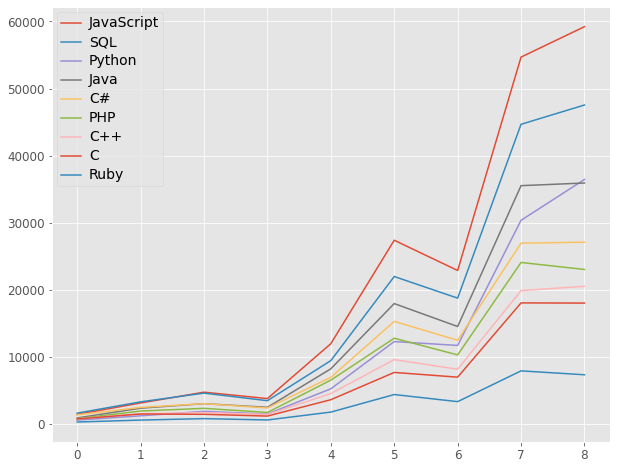

In [38]:
data.drop(['Lenguaje'],1).plot(figsize=(10, 8), fontsize=12)
legend = plt.legend()
legend.prop.set_size(14)

### **Utilizando Medias Moviles**

In [39]:
for i in data:

  contador = 0

  for j in data[i].values:
    data[i][contador] = float(j)
    contador = contador + 1

contador = 0 #para que no siga iterando sobre las nuevas columnas

for i in data:

  if contador > 0 and contador < 10:
    serie = pd.Series(data[i].values)

    nombre = 'mm' + i

    data[nombre] = pd.Series(serie).rolling(window=2).mean()
  elif contador == 0:
    contador = contador + 1

data

,Lenguaje,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby,mmJavaScript,mmSQL,mmPython,mmJava,mmC#,mmPHP,mmC++,mmC,mmRuby
0,2011,1420,1613,575,897,1352,788,740,741,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,3127,3294,1210,2348,2468,1925,1526,1484,577,2273.5,2453.5,892.5,1622.5,1910.0,1356.5,1133.0,1112.5,431.0
2,2013,4737,4594,1881,3020,3027,2327,1696,1436,794,3932.0,3944.0,1545.5,2684.0,2747.5,2126.0,1611.0,1460.0,685.5
3,2014,3783,3467,1476,2479,2378,1710,1418,1174,593,4260.0,4030.5,1678.5,2749.5,2702.5,2018.5,1557.0,1305.0,693.5
4,2015,11962,9439,5238,8219,6949,6529,4529,3612,1765,7872.5,6453.0,3357.0,5349.0,4663.5,4119.5,2973.5,2393.0,1179.0
5,2016,27385,21976,12282,17942,15283,12780,9589,7678,4383,19673.5,15707.5,8760.0,13080.5,11116.0,9654.5,7059.0,5645.0,3074.0
6,2017,22875,18754,11704,14524,12476,10290,8155,6974,3324,25130.0,20365.0,11993.0,16233.0,13879.5,11535.0,8872.0,7326.0,3853.5
7,2018,54686,44670,30359,35521,26954,24071,19872,18042,7911,38780.5,31712.0,21031.5,25022.5,19715.0,17180.5,14013.5,12508.0,5617.5
8,2019,59219,47544,36443,35917,27097,23030,20524,18017,7331,56952.5,46107.0,33401.0,35719.0,27025.5,23550.5,20198.0,18029.5,7621.0


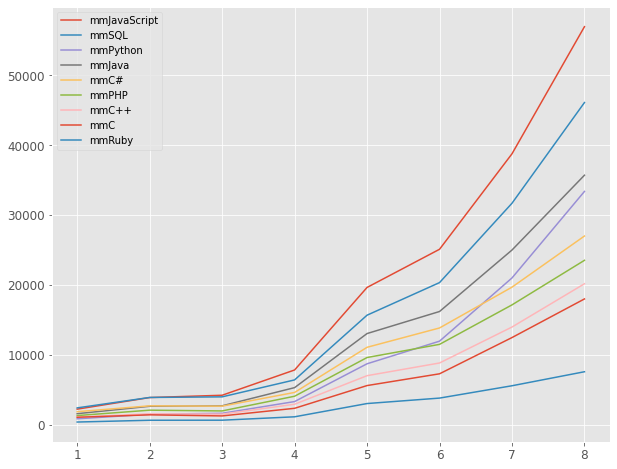

In [40]:
data_mm = data.iloc[:,10:]
data_mm.plot(figsize=(10, 8), fontsize=12)

### **ARIMA**

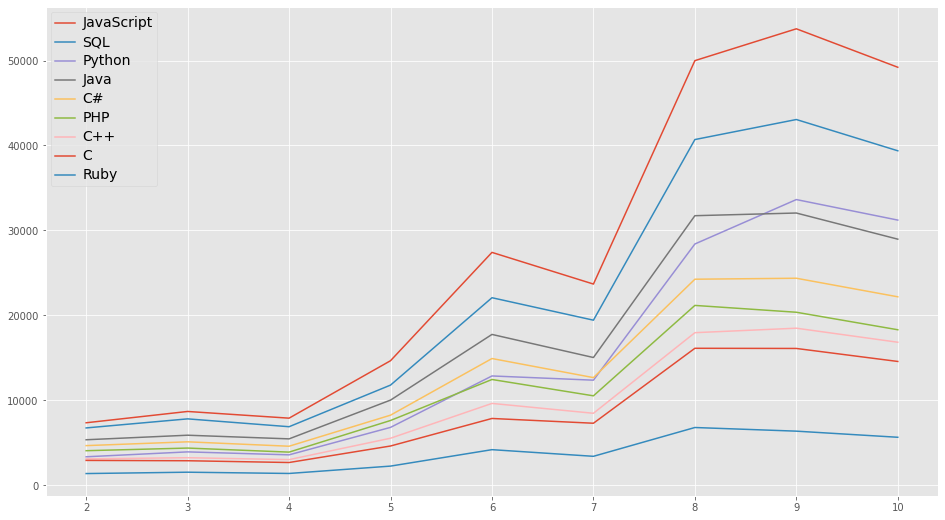

In [41]:
contador = 0

for i in data:
  if contador>0 and contador<=9:
    modelo = sm.tsa.ARIMA(data[i].iloc[1:], order=(1, 0, 0))
    resultados = modelo.fit(disp=0)
    predicted = resultados.predict(start=1,end=9)
    plt.plot(predicted, label=i)
  
  contador = contador + 1

legend = plt.legend()
legend.prop.set_size(14)
plt.show()

### **Datos porcentuales**

Ahora hagamos el análisis sobre tendencias en Lenguajes de Programación pero esta vez con datos porcentuales, es decir, el porcentaje de personas encuestadas que han trabajado determinado lenguaje


In [42]:
# Cargando los datos
porc = pd.read_csv('LenguajesPorcentual.csv')
# Solo escogeremos los primeros 9 lenguajes que son los que más consistencia han tenido a través de los años.
porc = porc.drop(['Go','R','Objective-C','Scala','Clojure','F#'],1)
porc

,Lenguaje,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby
0,2011,0.50,0.57,0.20,0.32,0.48,0.28,0.26,0.26,0.10
1,2012,0.50,0.53,0.19,0.38,0.40,0.31,0.24,0.24,0.09
2,2013,0.49,0.47,0.19,0.31,0.31,0.24,0.17,0.15,0.08
3,2014,0.49,0.45,0.19,0.32,0.31,0.22,0.19,0.15,0.08
4,2015,0.46,0.36,0.20,0.32,0.27,0.25,0.17,0.14,0.07
5,2016,0.49,0.39,0.22,0.32,0.27,0.23,0.17,0.14,0.08
6,2017,0.45,0.36,0.23,0.28,0.24,0.20,0.16,0.14,0.06
7,2018,0.55,0.45,0.31,0.36,0.27,0.24,0.20,0.18,0.08
8,2019,0.67,0.53,0.41,0.40,0.30,0.26,0.23,0.20,0.08


In [43]:
#Revisamos la forma de nuestros datos
porc.shape

(9, 10)

In [44]:
#Obtenemos estadísticos descriptivos de nuestros datos
porc.describe()

,Lenguaje,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000
mean,2015.000000,0.511111,0.456667,0.237778,0.334444,0.316667,0.247778,0.198889,0.177778,0.08000
std,2.738613,0.065849,0.076649,0.074963,0.037786,0.076158,0.032702,0.036209,0.046037,0.01118
min,2011.000000,0.450000,0.360000,0.190000,0.280000,0.240000,0.200000,0.160000,0.140000,0.06000
25%,2013.000000,0.490000,0.390000,0.190000,0.320000,0.270000,0.230000,0.170000,0.140000,0.08000
50%,2015.000000,0.490000,0.450000,0.200000,0.320000,0.300000,0.240000,0.190000,0.150000,0.08000
75%,2017.000000,0.500000,0.530000,0.230000,0.360000,0.310000,0.260000,0.230000,0.200000,0.08000
max,2019.000000,0.670000,0.570000,0.410000,0.400000,0.480000,0.310000,0.260000,0.260000,0.10000


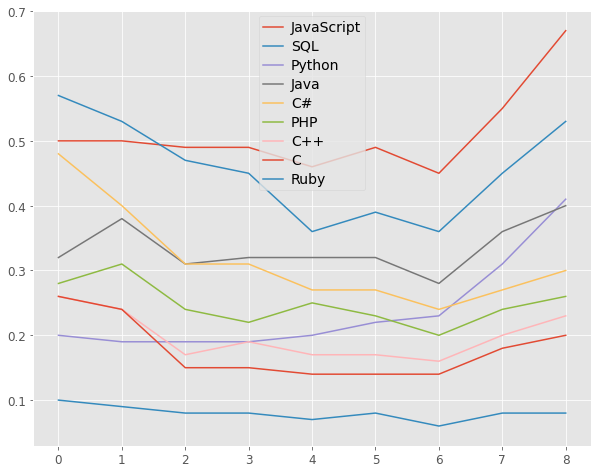

In [45]:
porc.drop(['Lenguaje'],1).plot(figsize=(10, 8), fontsize=12)
legend = plt.legend()
legend.prop.set_size(14)

In [46]:
for i in porc:

  contador = 0

  for j in porc[i].values:
    porc[i][contador] = float(j)
    contador = contador + 1

contador = 0 #para que no siga iterando sobre las nuevas columnas

for i in porc:

  if contador > 0 and contador < 10:
    serie = pd.Series(porc[i].values)

    nombre = 'mm' + i

    porc[nombre] = pd.Series(serie).rolling(window=2).mean()
  elif contador == 0:
    contador = contador + 1

porc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lenguaje,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby,mmJavaScript,mmSQL,mmPython,mmJava,mmC#,mmPHP,mmC++,mmC,mmRuby
0,2011,0.50,0.57,0.20,0.32,0.48,0.28,0.26,0.26,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,0.50,0.53,0.19,0.38,0.40,0.31,0.24,0.24,0.09,0.500,0.550,0.195,0.350,0.440,0.295,0.250,0.250,0.095
2,2013,0.49,0.47,0.19,0.31,0.31,0.24,0.17,0.15,0.08,0.495,0.500,0.190,0.345,0.355,0.275,0.205,0.195,0.085
3,2014,0.49,0.45,0.19,0.32,0.31,0.22,0.19,0.15,0.08,0.490,0.460,0.190,0.315,0.310,0.230,0.180,0.150,0.080
4,2015,0.46,0.36,0.20,0.32,0.27,0.25,0.17,0.14,0.07,0.475,0.405,0.195,0.320,0.290,0.235,0.180,0.145,0.075
5,2016,0.49,0.39,0.22,0.32,0.27,0.23,0.17,0.14,0.08,0.475,0.375,0.210,0.320,0.270,0.240,0.170,0.140,0.075
6,2017,0.45,0.36,0.23,0.28,0.24,0.20,0.16,0.14,0.06,0.470,0.375,0.225,0.300,0.255,0.215,0.165,0.140,0.070
7,2018,0.55,0.45,0.31,0.36,0.27,0.24,0.20,0.18,0.08,0.500,0.405,0.270,0.320,0.255,0.220,0.180,0.160,0.070
8,2019,0.67,0.53,0.41,0.40,0.30,0.26,0.23,0.20,0.08,0.610,0.490,0.360,0.380,0.285,0.250,0.215,0.190,0.080


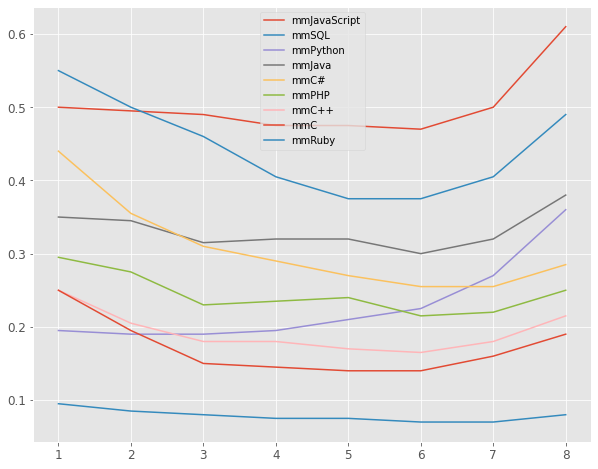

In [47]:
data_mm = porc.iloc[:,10:]
data_mm.plot(figsize=(10, 8), fontsize=12)

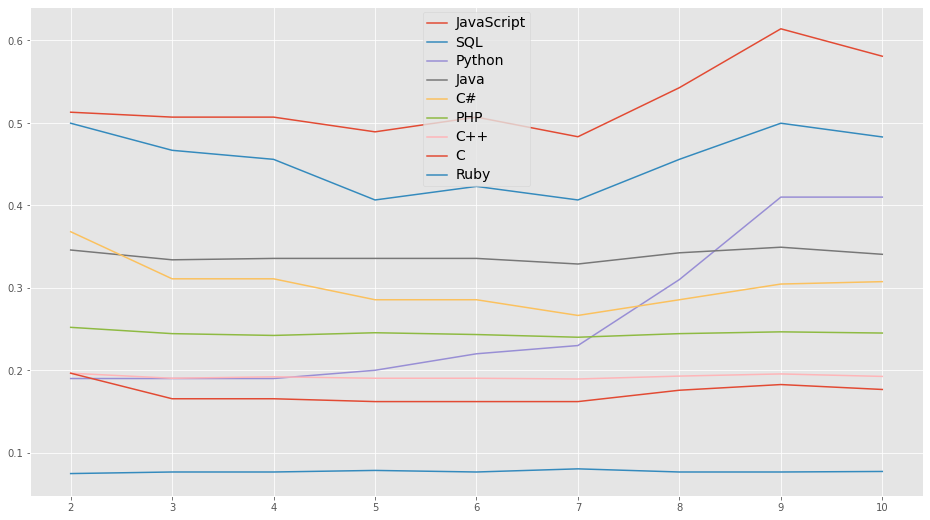

In [48]:
contador = 0

for i in porc:
  if contador>0 and contador<=9:
    modelo = sm.tsa.ARIMA(porc[i].iloc[1:], order=(1, 0, 0))
    resultados = modelo.fit(disp=0)
    predicted = resultados.predict(start=1,end=9)
    plt.plot(predicted, label=i)
  
  contador = contador + 1

legend = plt.legend()
legend.prop.set_size(14)
plt.show()

## **Salarios en el mundo de la Tecnología**

In [49]:
# Cargando los datos
salarios = pd.read_csv('SalariosExperiencia.csv')
salarios

,Experiencia,1 - 2 years,11+ years,2 - 5 years,6 - 10 years
0,2011,71622,170335,91853,123323
1,2012,71987,171333,88455,119103
2,2013,79877,174022,92836,127864
3,2014,61333,176075,88771,122471
4,2016,49130,174200,76083,115870
5,2017,40572,93313,48922,63339
6,2018,114074,257908,139341,178806
7,2019,174168,309416,182497,222609


In [50]:
#Revisamos la forma de nuestros datos
salarios.shape

(8, 5)

In [51]:
#Obtenemos estadísticos descriptivos de nuestros datos
salarios.describe()

,Experiencia,1 - 2 years,11+ years,2 - 5 years,6 - 10 years
count,8.0000,8.000000,8.000000,8.000000,8.000000
mean,2015.0000,82845.375000,190825.250000,101094.750000,134173.125000
std,2.9277,43018.726128,65080.846877,41234.417686,47339.282744
min,2011.0000,40572.000000,93313.000000,48922.000000,63339.000000
25%,2012.7500,58282.250000,171083.500000,85362.000000,118294.750000
50%,2015.0000,71804.500000,174111.000000,90312.000000,122897.000000
75%,2017.2500,88426.250000,196533.250000,104462.250000,140599.500000
max,2019.0000,174168.000000,309416.000000,182497.000000,222609.000000


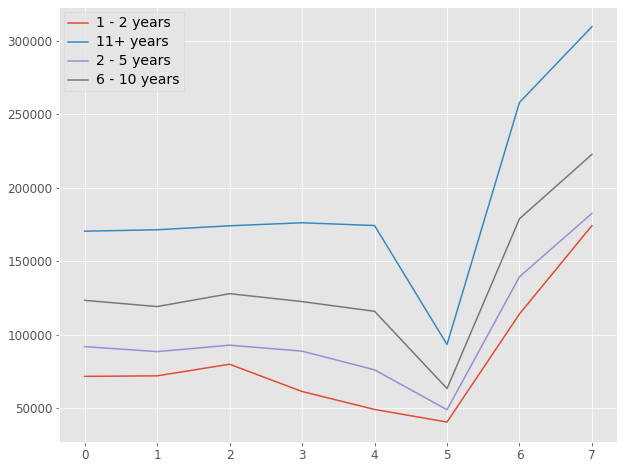

In [52]:
salarios.drop(['Experiencia'],1).plot(figsize=(10, 8), fontsize=12)
legend = plt.legend()
legend.prop.set_size(14)

In [53]:
for i in salarios:

  contador = 0

  for j in salarios[i].values:
    salarios[i][contador] = float(j)
    contador = contador + 1

contador = 0 #para que no siga iterando sobre las nuevas columnas

for i in salarios:

  if contador > 0 and contador < 10:
    serie = pd.Series(salarios[i].values)

    nombre = 'mm' + i

    salarios[nombre] = pd.Series(serie).rolling(window=2).mean()
  elif contador == 0:
    contador = contador + 1

salarios

,Experiencia,1 - 2 years,11+ years,2 - 5 years,6 - 10 years,mm1 - 2 years,mm11+ years,mm2 - 5 years,mm6 - 10 years
0,2011,71622,170335,91853,123323,NaN,NaN,NaN,NaN
1,2012,71987,171333,88455,119103,71804.5,170834.0,90154.0,121213.0
2,2013,79877,174022,92836,127864,75932.0,172677.5,90645.5,123483.5
3,2014,61333,176075,88771,122471,70605.0,175048.5,90803.5,125167.5
4,2016,49130,174200,76083,115870,55231.5,175137.5,82427.0,119170.5
5,2017,40572,93313,48922,63339,44851.0,133756.5,62502.5,89604.5
6,2018,114074,257908,139341,178806,77323.0,175610.5,94131.5,121072.5
7,2019,174168,309416,182497,222609,144121.0,283662.0,160919.0,200707.5


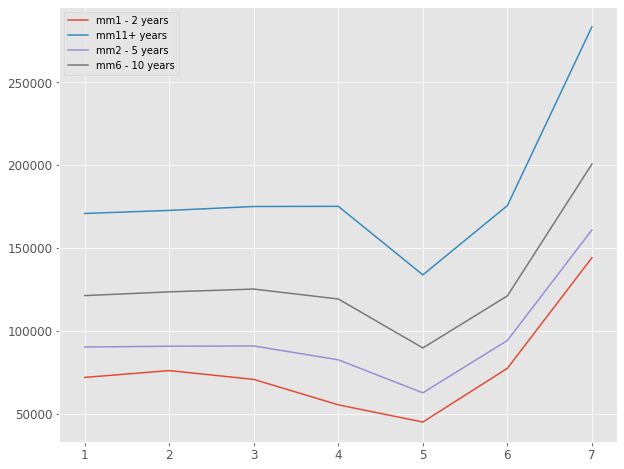

In [54]:
data_mm = salarios.iloc[:,5:]
data_mm.plot(figsize=(10, 8), fontsize=12)

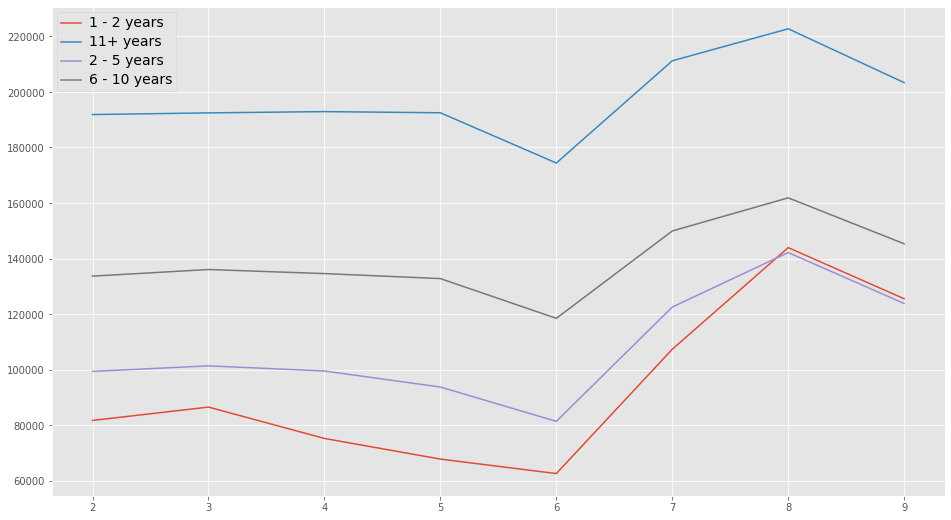

In [55]:
contador = 0

for i in salarios:
  if contador>0 and contador<=4:
    modelo = sm.tsa.ARIMA(salarios[i].iloc[1:], order=(1, 0, 0))
    resultados = modelo.fit(disp=0)
    predicted = resultados.predict(start=1,end=8)
    plt.plot(predicted, label=i)
  
  contador = contador + 1

legend = plt.legend()
legend.prop.set_size(14)
plt.show()